In [81]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn import feature_selection, linear_model
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

<strong><font size="10">Walmart Data</font></strong> 

<ul><li><strong><font size="18">Background:</font></strong></li> 
&nbsp;
&nbsp;
<strong>
<li>Retail sales account for roughly 20% of US GDP.</li>


<li>Approximately $3 Trillion per year.</li>

<li>The retail sector is the largest private provider of US Jobs and contributes over $1.6 Trillion in labor income.</li>

<li>Across the retail sector each year, approximately 20% of all sales occur during the month of December.</li>

<li>Walmart, one the worlds largest retailers generates more than $485 Billion dollars worth of sales annually.</li>
<li>Walmart engages in holiday promotions 3 times per year.</li></ul></strong>
<p><strong><font size="4">Holidays include:</strong></p> 
<strong><ol><li>Labor Day (September)</li>
<li>Thanksgiving (November)</li>
<li>Christmas (December)</li></ol></strong> 


<ul><li><strong>Let's explore the Walmart data set to see if there are any correlations between Weekly Sales and:<ul>
&nbsp;
&nbsp;
<li>Holiday Promotions</li>
<li>Departments</li>
<li>Date</li>
<li>Specific Stores</li></strong> 

In [82]:
df = pd.read_csv('train.csv')

In [83]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


<strong>Exploring the Data. Looking for the min, max, and mean of Weekly Sales.</strong> 

In [84]:
df.count()

Store           421570
Dept            421570
Date            421570
Weekly_Sales    421570
IsHoliday       421570
dtype: int64

In [85]:
df.Weekly_Sales.mean()

15981.258123467243

In [86]:
df.Weekly_Sales.var()

515797856.84110695

In [87]:
df.Weekly_Sales.std()

22711.18351916313

In [88]:
df.Weekly_Sales.median()

7612.03

In [89]:
df.min()

Store                    1
Dept                     1
Date            2010-02-05
Weekly_Sales      -4988.94
IsHoliday            False
dtype: object

In [90]:
df.max()

Store                   45
Dept                    99
Date            2012-10-26
Weekly_Sales        693099
IsHoliday             True
dtype: object

<strong>Which row has the lowest performing Weekly Sales out of the whole df?</strong> 

In [91]:
df[df.Weekly_Sales == df.Weekly_Sales.min()]

,Store,Dept,Date,Weekly_Sales,IsHoliday
267730,28,6,2010-10-08,-4988.94,False


<strong>This department must have been rocked by heavy returns</strong>

<strong>Which row has the highest performing Weekly Sales?</strong>

In [92]:
df[df.Weekly_Sales == df.Weekly_Sales.max()]

,Store,Dept,Date,Weekly_Sales,IsHoliday
95373,10,72,2010-11-26,693099.36,True


<strong>Lets see if there are any overt correlations</strong> 

In [93]:
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday
Store,1.000000,0.024004,-0.085195,-0.000548
Dept,0.024004,1.000000,0.148032,0.000916
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774
IsHoliday,-0.000548,0.000916,0.012774,1.000000


In [94]:
 df[ ['Weekly_Sales', 'IsHoliday'] ].corr()

,Weekly_Sales,IsHoliday
Weekly_Sales,1.000000,0.012774
IsHoliday,0.012774,1.000000


&#128532;&nbsp;&#128532;&nbsp;&#128532;&nbsp;&#128532;&nbsp;&#128532;&nbsp;&nbsp;<strong>Not too much</strong>

<strong><font size="8">Visualizing the Data</font><strong>

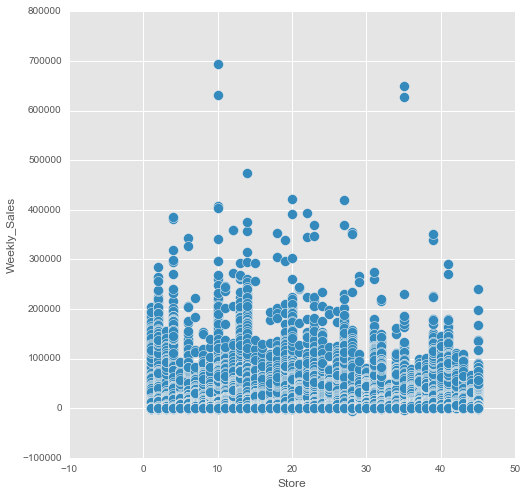

In [95]:
df.plot(kind = 'scatter', x = 'Store', y = 'Weekly_Sales', s = 100, figsize = (8, 8))

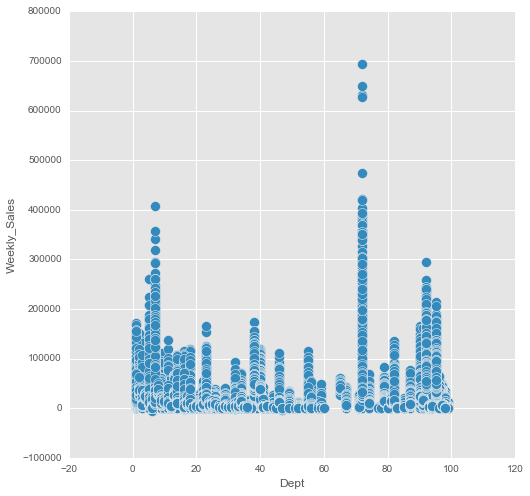

In [96]:
df.plot(kind = 'scatter', x = 'Dept', y = 'Weekly_Sales', s = 100, figsize = (8, 8))

<strong>Well, it looks like departments 78 and 3 stand out.</strong> 

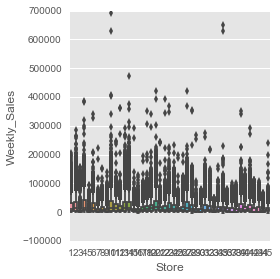

In [97]:
sns.factorplot(x = 'Store',
    y = 'Weekly_Sales',
    data = df,
    kind = 'box')

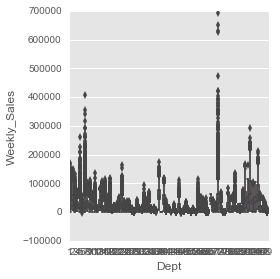

In [98]:
sns.factorplot(x = 'Dept',
    y = 'Weekly_Sales',
    data = df,
    kind = 'box')

<font size="7">&#128565;&nbsp;<strong>Um, what??</strong></font>

<strong><font size="5">Maybe a few models will tell us something</font></strong> 

In [99]:
X = df[ ['IsHoliday'] ]
y = df.Weekly_Sales

model = smf.OLS(y, X).fit()

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                 1.147e+04
Date:                Thu, 07 Jul 2016   Prob (F-statistic):               0.00
Time:                        13:40:39   Log-Likelihood:            -4.9059e+06
No. Observations:              421570   AIC:                         9.812e+06
Df Residuals:                  421569   BIC:                         9.812e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
IsHoliday   1.704e+04    159.097    107.078      0.000      1.67e+04  1.73e+04
==============================================================================
Omnibus:                   291342.607   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6939384.221
Skew:                           3.028   Prob(JB):                         0.00
Kurtosis:                      21.931   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
model = smf.ols(formula = 'Weekly_Sales ~  + IsHoliday + Dept', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4758.
Date:                Thu, 07 Jul 2016   Prob (F-statistic):               0.00
Time:                        13:40:44   Log-Likelihood:            -4.8221e+06
No. Observations:              421570   AIC:                         9.644e+06
Df Residuals:                  421567   BIC:                         9.644e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          1.102e+04     61.703    178.641      0.000      1.09e+04  1.11e+04
IsHoliday[T.True]  1122.3364    135.252      8.298      0.000       857.247  1387.426
Dept                110.2491      1.134     97.186      0.000       108.026   112.472
==============================================================================
Omnibus:                   301116.944   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8322751.368
Skew:                           3.123   Prob(JB):                         0.00
Kurtosis:                      23.852   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
model = smf.ols(formula = 'Weekly_Sales ~ IsHoliday +Store + Dept', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     4339.
Date:                Thu, 07 Jul 2016   Prob (F-statistic):               0.00
Time:                        13:40:49   Log-Likelihood:            -4.8204e+06
No. Observations:              421570   AIC:                         9.641e+06
Df Residuals:                  421566   BIC:                         9.641e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          1.445e+04     84.945    170.162      0.000      1.43e+04  1.46e+04
IsHoliday[T.True]  1117.8421    134.706      8.298      0.000       853.822  1381.862
Store              -157.7263      2.695    -58.518      0.000      -163.009  -152.443
Dept                111.8366      1.130     98.956      0.000       109.621   114.052
==============================================================================
Omnibus:                   298948.765   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8248754.344
Skew:                           3.089   Prob(JB):                         0.00
Kurtosis:                      23.771   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<strong>Let's clean up the data.....</strong>'

In [103]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', len(df)

    Q1 = df.Weekly_Sales.quantile(.25)
    Q2 = df.Weekly_Sales.quantile(.5)
    Q3 = df.Weekly_Sales.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    df.drop(df[(df.Weekly_Sales < Q1 - 1.5 * IQR) | (df.Weekly_Sales > Q3 + 1.5 * IQR)].index, inplace = True)

    print '- n (after)  =', len(df)
    
drop_outliers(df)

Dropping outliers
- n (before) = 421570
- Q1         = 2079.65 ($M)
- Q2/Median  = 7612.03 ($M)
- Q3         = 20205.8525 ($M)
- n (after)  = 386049


In [104]:
model = smf.ols(formula = 'Weekly_Sales ~ IsHoliday +Store + Dept', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     394.1
Date:                Thu, 07 Jul 2016   Prob (F-statistic):          1.23e-255
Time:                        13:41:00   Log-Likelihood:            -4.1509e+06
No. Observations:              386049   AIC:                         8.302e+06
Df Residuals:                  386045   BIC:                         8.302e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          1.156e+04     45.165    255.924      0.000      1.15e+04  1.16e+04
IsHoliday[T.True]   241.8384     71.318      3.391      0.001       102.058   381.619
Store               -48.6453      1.423    -34.178      0.000       -51.435   -45.856
Dept                  1.3792      0.615      2.243      0.025         0.174     2.584
==============================================================================
Omnibus:                    75120.319   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127552.897
Skew:                           1.321   Prob(JB):                         0.00
Kurtosis:                       3.976   Cond. No.                         219.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<strong>After dropping outliers, the model actually got worse.</strong>

<ul><li><strong>It appears that there are no strong correlations right off the bat.</strong></li>
<li><strong>Let's explore one store to see if there is anything significant in a smaller data set.</strong></li></ul>

In [105]:
df = df[df.Store == 1]

In [106]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
10239,1,99,2012-08-31,20.06,False
10240,1,99,2012-09-07,0.05,True
10241,1,99,2012-09-14,0.03,False
10242,1,99,2012-10-05,635.00,False


In [107]:
model = smf.ols(formula = 'Weekly_Sales ~ IsHoliday +Store + Dept', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.259
Date:                Thu, 07 Jul 2016   Prob (F-statistic):           0.000708
Time:                        13:41:04   Log-Likelihood:                -96746.
No. Observations:                8907   AIC:                         1.935e+05
Df Residuals:                    8904   BIC:                         1.935e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          6754.8924    119.486     56.533      0.000      6520.673  6989.112
IsHoliday[T.True]   647.6362    523.519      1.237      0.216      -378.583  1673.855
Store              6754.8924    119.486     56.533      0.000      6520.673  6989.112
Dept                -17.5995      4.883     -3.604      0.000       -27.172    -8.027
==============================================================================
Omnibus:                     1139.354   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1641.593
Skew:                           1.051   Prob(JB):                         0.00
Kurtosis:                       2.917   Cond. No.                     2.60e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.09e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<ul><li><strong>Slightly worse.</strong></li>
<li><strong>Lets transform the data and add some extra features.</strong></li></ul>

In [108]:
df.Date

0        2010-02-05
1        2010-02-12
2        2010-02-19
3        2010-02-26
4        2010-03-05
            ...    
10239    2012-08-31
10240    2012-09-07
10241    2012-09-14
10242    2012-10-05
10243    2012-10-12
Name: Date, dtype: object

In [109]:
df.Date = pd.to_datetime(df.Date)

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [110]:
df.Date

0       2010-02-05
1       2010-02-12
2       2010-02-19
3       2010-02-26
4       2010-03-05
           ...    
10239   2012-08-31
10240   2012-09-07
10241   2012-09-14
10242   2012-10-05
10243   2012-10-12
Name: Date, dtype: datetime64[ns]

In [111]:
df.set_index('Date', inplace = True)

df['Year'] = df.index.year
df['Month'] = df.index.month

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [112]:
df

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month
Date,,,,,,
2010-02-05,1,1,24924.50,False,2010,2
2010-02-12,1,1,46039.49,True,2010,2
2010-02-19,1,1,41595.55,False,2010,2
2010-02-26,1,1,19403.54,False,2010,2
2010-03-05,1,1,21827.90,False,2010,3
...,...,...,...,...,...,...
2012-08-31,1,99,20.06,False,2012,8
2012-09-07,1,99,0.05,True,2012,9
2012-09-14,1,99,0.03,False,2012,9


<strong>Now we have added both 'Year' and 'Month' to the data frame.</strong> 

In [113]:
model = smf.ols(formula = 'Weekly_Sales ~ Month + Year', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.659
Date:                Thu, 07 Jul 2016   Prob (F-statistic):              0.190
Time:                        13:41:27   Log-Likelihood:                -96752.
No. Observations:                8907   AIC:                         1.935e+05
Df Residuals:                    8904   BIC:                         1.935e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.768e+05   3.44e+05     -0.514      0.607     -8.51e+05  4.97e+05
Month         76.2617     42.140      1.810      0.070        -6.343   158.866
Year          94.0828    171.007      0.550      0.582      -241.131   429.296
==============================================================================
Omnibus:                     1129.008   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1620.878
Skew:                           1.044   Prob(JB):                         0.00
Kurtosis:                       2.909   Cond. No.                     5.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size="8"><strong>Viszualizing the Data Again</strong></font>

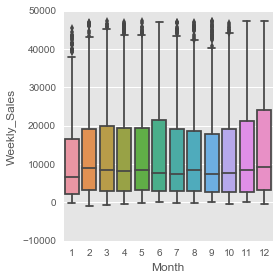

In [114]:
sns.factorplot(x = 'Month',
    y = 'Weekly_Sales',
    data = df,
    kind = 'box')

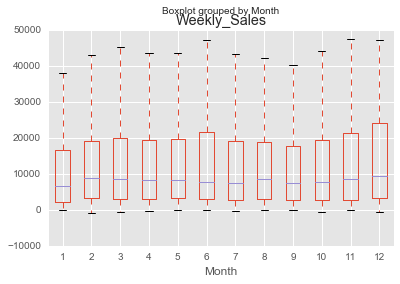

In [115]:
df.boxplot('Weekly_Sales', by = 'Month')

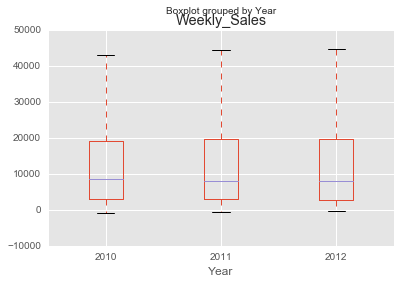

In [116]:
df.boxplot('Weekly_Sales', by = 'Year')

<font size= "6"><strong>Expanding the DF Further:</strong></font>

<strong>Lets create a category for high sales and low sales</strong>

In [117]:
df.Weekly_Sales < 1600

Date
2010-02-05    False
2010-02-12    False
2010-02-19    False
2010-02-26    False
2010-03-05    False
              ...  
2012-08-31     True
2012-09-07     True
2012-09-14     True
2012-10-05     True
2012-10-12     True
Name: Weekly_Sales, dtype: bool

In [118]:
mask = (df['Weekly_Sales'] > df['Weekly_Sales'].median())

df['SalesCategory'] = 'Low'
df.loc[mask, 'SalesCategory'] = 'High'

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<font size="6"><strong>Turning Booleans into Dummies&nbsp;&nbsp;&#128526;:</strong></font>  

In [119]:
df['SalesBinary'] = df.SalesCategory.map({'Low' : 0, 'High' : 1})

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month,SalesCategory,SalesBinary
Date,,,,,,,,
2010-02-05,1,1,24924.50,False,2010,2,High,1
2010-02-12,1,1,46039.49,True,2010,2,High,1
2010-02-19,1,1,41595.55,False,2010,2,High,1
2010-02-26,1,1,19403.54,False,2010,2,High,1
2010-03-05,1,1,21827.90,False,2010,3,High,1


In [43]:
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month,SalesBinary
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dept,NaN,1.000000,-0.038161,0.000079,-0.001109,0.009178,-0.046815
Weekly_Sales,NaN,-0.038161,1.000000,0.013096,0.002217,0.018402,0.762362
IsHoliday,NaN,0.000079,0.013096,1.000000,-0.055619,0.124674,0.013656
Year,NaN,-0.001109,0.002217,-0.055619,1.000000,-0.190488,-0.020007
Month,NaN,0.009178,0.018402,0.124674,-0.190488,1.000000,0.003174
SalesBinary,NaN,-0.046815,0.762362,0.013656,-0.020007,0.003174,1.000000


<strong>Let's try some more models</strong>

In [45]:
model = smf.ols(formula = 'Weekly_Sales ~ Month + IsHoliday ', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.036
Date:                Tue, 05 Jul 2016   Prob (F-statistic):              0.131
Time:                        20:19:47   Log-Likelihood:                -96752.
No. Observations:                8907   AIC:                         1.935e+05
Df Residuals:                    8904   BIC:                         1.935e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          1.239e+04    298.286     41.528      0.000      1.18e+04   1.3e+04
IsHoliday[T.True]   542.4938    527.945      1.028      0.304      -492.401  1577.389
Month                66.5042     41.692      1.595      0.111       -15.222   148.230
==============================================================================
Omnibus:                     1130.011   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1623.011
Skew:                           1.045   Prob(JB):                         0.00
Kurtosis:                       2.912   Cond. No.                         28.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model = smf.ols(formula = 'Weekly_Sales ~ IsHoliday + SalesBinary', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     6178.
Date:                Tue, 05 Jul 2016   Prob (F-statistic):               0.00
Time:                        20:44:59   Log-Likelihood:                -92878.
No. Observations:                8907   AIC:                         1.858e+05
Df Residuals:                    8904   BIC:                         1.858e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          3218.4913    124.547     25.842      0.000      2974.351  3462.632
IsHoliday[T.True]   132.7854    339.101      0.392      0.695      -531.930   797.501
SalesBinary        1.925e+04    173.235    111.145      0.000      1.89e+04  1.96e+04
==============================================================================
Omnibus:                      542.575   Durbin-Watson:                   0.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              655.510
Skew:                           0.617   Prob(JB):                    4.55e-143
Kurtosis:                       3.492   Cond. No.                         4.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<strong>Ok, so there is a significant leap, but there's not much going on here. Time to move on to another form of investigation.</strong> 